In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg

In [3]:
df=pd.read_csv("LMData.csv") 
df


,rgi_id,o1region,o2region,glims_id,anlys_id,subm_id,src_date,cenlon,cenlat,utm_zone,...,termlat,zmin_m,zmax_m,zmed_m,zmean_m,slope_deg,aspect_deg,aspect_sec,dem_source,lmax_m
0,RGI2000-v7.0-G-01-00001,1,01-01,G204091E67414N,392889,624,2008-09-02T00:00:00,-155.909404,67.413726,5,...,67.416034,1485.31760,1693.62350,1544.66940,1553.94030,17.606613,342.330469,1,COPDEM30,725
1,RGI2000-v7.0-G-01-00002,1,01-01,G204121E67419N,392890,624,2008-09-02T00:00:00,-155.879114,67.419232,5,...,67.421273,1278.40060,1394.76570,1328.55660,1330.91500,19.846369,345.367012,1,COPDEM30,484
2,RGI2000-v7.0-G-01-00003,1,01-01,G204471E67431N,392897,624,2008-09-02T00:00:00,-155.530786,67.431484,5,...,67.435694,1294.70340,1704.74200,1423.20680,1437.23520,23.690063,13.467490,1,COPDEM30,1099
3,RGI2000-v7.0-G-01-00004,1,01-01,G204497E67431N,392899,624,2008-09-02T00:00:00,-155.501948,67.430514,5,...,67.433367,1224.17880,1286.89770,1249.63060,1249.06620,12.782562,42.854332,2,COPDEM30,652
4,RGI2000-v7.0-G-01-00005,1,01-01,G204521E67429N,392901,624,2008-09-02T00:00:00,-155.478173,67.432873,5,...,67.438901,1052.44010,1488.12990,1290.89230,1273.78340,17.148510,299.058193,8,COPDEM30,1903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27504,RGI2000-v7.0-G-01-27505,1,01-06,G232055E58382N,419220,624,2005-08-15T00:00:00,-127.943494,58.381563,9,...,58.382501,1856.43870,2095.01120,1958.53970,1956.88500,30.104969,24.649687,2,COPDEM30,757
27505,RGI2000-v7.0-G-01-27506,1,01-06,G232006E58375N,419219,624,2005-08-15T00:00:00,-127.994907,58.374932,9,...,58.372995,1871.68970,2229.32130,2045.29190,2041.02940,28.225796,85.414560,3,COPDEM30,915
27506,RGI2000-v7.0-G-01-27507,1,01-06,G231997E58381N,419218,624,2005-08-15T00:00:00,-128.003487,58.380406,9,...,58.383243,1762.79870,2032.12080,1913.04610,1907.25850,26.389137,348.349361,1,COPDEM30,714
27507,RGI2000-v7.0-G-01-27508,1,01-06,G231855E58382N,419215,624,2005-08-15T00:00:00,-128.146532,58.381816,9,...,58.381107,1982.91860,2225.51100,2126.63960,2120.08740,25.529028,70.835080,3,COPDEM30,489


## Correlation matrix attempt
Clean up data by dropping unecessary columns
Create new dataframe with filtered data

In [4]:
# what data types are there in the csv?
df.dtypes

rgi_id         object
o1region        int64
o2region       object
glims_id       object
anlys_id        int64
subm_id         int64
src_date       object
cenlon        float64
cenlat        float64
utm_zone        int64
area_km2      float64
primeclass      int64
conn_lvl        int64
surge_type      int64
term_type       int64
glac_name      object
is_rgi6         int64
termlon       float64
termlat       float64
zmin_m        float64
zmax_m        float64
zmed_m        float64
zmean_m       float64
slope_deg     float64
aspect_deg    float64
aspect_sec      int64
dem_source     object
lmax_m          int64
dtype: object

In [5]:
# select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
numeric_df
numeric_df.columns


Index(['o1region', 'anlys_id', 'subm_id', 'cenlon', 'cenlat', 'utm_zone',
       'area_km2', 'primeclass', 'conn_lvl', 'surge_type', 'term_type',
       'is_rgi6', 'termlon', 'termlat', 'zmin_m', 'zmax_m', 'zmed_m',
       'zmean_m', 'slope_deg', 'aspect_deg', 'aspect_sec', 'lmax_m'],
      dtype='object')

In [6]:
# check what columns were kept after first filtering
print(f"Original: {df.shape}")
print(f"After removing non-numeric: {numeric_df.shape}")


Original: (27509, 28)
After removing non-numeric: (27509, 22)


In [7]:
# check for missing values
numeric_df.isnull().sum()


o1region      0
anlys_id      0
subm_id       0
cenlon        0
cenlat        0
utm_zone      0
area_km2      0
primeclass    0
conn_lvl      0
surge_type    0
term_type     0
is_rgi6       0
termlon       0
termlat       0
zmin_m        0
zmax_m        0
zmed_m        0
zmean_m       0
slope_deg     0
aspect_deg    0
aspect_sec    0
lmax_m        0
dtype: int64

In [8]:
# what columns have unique values?
numeric_df.nunique()


o1region          1
anlys_id      27321
subm_id           5
cenlon        27509
cenlat        27484
utm_zone          9
area_km2      27509
primeclass        1
conn_lvl          1
surge_type        4
term_type         2
is_rgi6           2
termlon       27509
termlat       27509
zmin_m        27487
zmax_m        27479
zmed_m        27479
zmean_m       27477
slope_deg     27477
aspect_deg    27502
aspect_sec        8
lmax_m         4854
dtype: int64

In [9]:
# Drop constant columns
numeric_df_clean = numeric_df.loc[:, numeric_df.nunique() > 1]
numeric_df_clean


,anlys_id,subm_id,cenlon,cenlat,utm_zone,area_km2,surge_type,term_type,is_rgi6,termlon,termlat,zmin_m,zmax_m,zmed_m,zmean_m,slope_deg,aspect_deg,aspect_sec,lmax_m
0,392889,624,-155.909404,67.413726,5,0.239199,0,9,1,-155.904032,67.416034,1485.31760,1693.62350,1544.66940,1553.94030,17.606613,342.330469,1,725
1,392890,624,-155.879114,67.419232,5,0.104641,0,9,1,-155.878512,67.421273,1278.40060,1394.76570,1328.55660,1330.91500,19.846369,345.367012,1,484
2,392897,624,-155.530786,67.431484,5,0.216605,0,9,1,-155.529516,67.435694,1294.70340,1704.74200,1423.20680,1437.23520,23.690063,13.467490,1,1099
3,392899,624,-155.501948,67.430514,5,0.252649,0,9,1,-155.502283,67.433367,1224.17880,1286.89770,1249.63060,1249.06620,12.782562,42.854332,2,652
4,392901,624,-155.478173,67.432873,5,0.474716,0,9,1,-155.499392,67.438901,1052.44010,1488.12990,1290.89230,1273.78340,17.148510,299.058193,8,1903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27504,419220,624,-127.943494,58.381563,9,0.190275,0,9,1,-127.940038,58.382501,1856.43870,2095.01120,1958.53970,1956.88500,30.104969,24.649687,2,757
27505,419219,624,-127.994907,58.374932,9,0.230076,0,9,1,-127.986927,58.372995,1871.68970,2229.32130,2045.29190,2041.02940,28.225796,85.414560,3,915
27506,419218,624,-128.003487,58.380406,9,0.187298,0,9,1,-128.006498,58.383243,1762.79870,2032.12080,1913.04610,1907.25850,26.389137,348.349361,1,714
27507,419215,624,-128.146532,58.381816,9,0.152301,0,9,1,-128.140327,58.381107,1982.91860,2225.51100,2126.63960,2120.08740,25.529028,70.835080,3,489


In [10]:
# Drop id columns
numeric_df_clean = numeric_df_clean.drop(['anlys_id', 'subm_id'], axis = 1)
numeric_df_clean

,cenlon,cenlat,utm_zone,area_km2,surge_type,term_type,is_rgi6,termlon,termlat,zmin_m,zmax_m,zmed_m,zmean_m,slope_deg,aspect_deg,aspect_sec,lmax_m
0,-155.909404,67.413726,5,0.239199,0,9,1,-155.904032,67.416034,1485.31760,1693.62350,1544.66940,1553.94030,17.606613,342.330469,1,725
1,-155.879114,67.419232,5,0.104641,0,9,1,-155.878512,67.421273,1278.40060,1394.76570,1328.55660,1330.91500,19.846369,345.367012,1,484
2,-155.530786,67.431484,5,0.216605,0,9,1,-155.529516,67.435694,1294.70340,1704.74200,1423.20680,1437.23520,23.690063,13.467490,1,1099
3,-155.501948,67.430514,5,0.252649,0,9,1,-155.502283,67.433367,1224.17880,1286.89770,1249.63060,1249.06620,12.782562,42.854332,2,652
4,-155.478173,67.432873,5,0.474716,0,9,1,-155.499392,67.438901,1052.44010,1488.12990,1290.89230,1273.78340,17.148510,299.058193,8,1903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27504,-127.943494,58.381563,9,0.190275,0,9,1,-127.940038,58.382501,1856.43870,2095.01120,1958.53970,1956.88500,30.104969,24.649687,2,757
27505,-127.994907,58.374932,9,0.230076,0,9,1,-127.986927,58.372995,1871.68970,2229.32130,2045.29190,2041.02940,28.225796,85.414560,3,915
27506,-128.003487,58.380406,9,0.187298,0,9,1,-128.006498,58.383243,1762.79870,2032.12080,1913.04610,1907.25850,26.389137,348.349361,1,714
27507,-128.146532,58.381816,9,0.152301,0,9,1,-128.140327,58.381107,1982.91860,2225.51100,2126.63960,2120.08740,25.529028,70.835080,3,489


In [11]:
# Build a correlation matrix to see which variables are correlated
correlation_matrix = numeric_df_clean.corr()
correlation_matrix

,cenlon,cenlat,utm_zone,area_km2,surge_type,term_type,is_rgi6,termlon,termlat,zmin_m,zmax_m,zmed_m,zmean_m,slope_deg,aspect_deg,aspect_sec,lmax_m
cenlon,1.000000,-0.539581,0.980461,-0.000631,-0.054493,0.011735,0.237106,0.999994,-0.539482,0.121238,0.113462,0.141744,0.138500,0.021095,-0.092966,-0.092627,-0.007697
cenlat,-0.539581,1.000000,-0.544121,0.008230,0.095889,-0.005305,-0.236409,-0.539562,0.999990,0.290131,0.259682,0.281871,0.285072,0.062618,0.024593,-0.017907,0.010378
utm_zone,0.980461,-0.544121,1.000000,-0.002693,-0.065460,0.008880,0.223911,0.980444,-0.544014,0.112637,0.100042,0.130153,0.126773,0.009797,-0.088851,-0.089662,-0.011552
area_km2,-0.000631,0.008230,-0.002693,1.000000,0.230100,-0.210056,0.008172,-0.000824,0.006831,-0.121162,0.187795,-0.001716,-0.003735,-0.119344,-0.004918,-0.001572,0.797626
surge_type,-0.054493,0.095889,-0.065460,0.230100,1.000000,-0.082613,0.034391,-0.054399,0.095752,0.054225,0.274242,0.165681,0.164843,0.002315,-0.004283,-0.007844,0.322415
term_type,0.011735,-0.005305,0.008880,-0.210056,-0.082613,1.000000,0.016398,0.011663,-0.004793,0.109145,-0.055735,0.027257,0.029230,0.057706,0.006659,0.003858,-0.237819
is_rgi6,0.237106,-0.236409,0.223911,0.008172,0.034391,0.016398,1.000000,0.237146,-0.236396,0.166407,0.198741,0.195710,0.196321,0.013065,-0.057611,-0.061921,0.024049
termlon,0.999994,-0.539562,0.980444,-0.000824,-0.054399,0.011663,0.237146,1.000000,-0.539462,0.121268,0.113424,0.141754,0.138510,0.021091,-0.093871,-0.093410,-0.007800
termlat,-0.539482,0.999990,-0.544014,0.006831,0.095752,-0.004793,-0.236396,-0.539462,1.000000,0.290178,0.259647,0.281944,0.285149,0.062538,0.024559,-0.018580,0.009599
zmin_m,0.121238,0.290131,0.112637,-0.121162,0.054225,0.109145,0.166407,0.121268,0.290178,1.000000,0.721296,0.919327,0.925453,0.323383,-0.053821,-0.061883,-0.256154


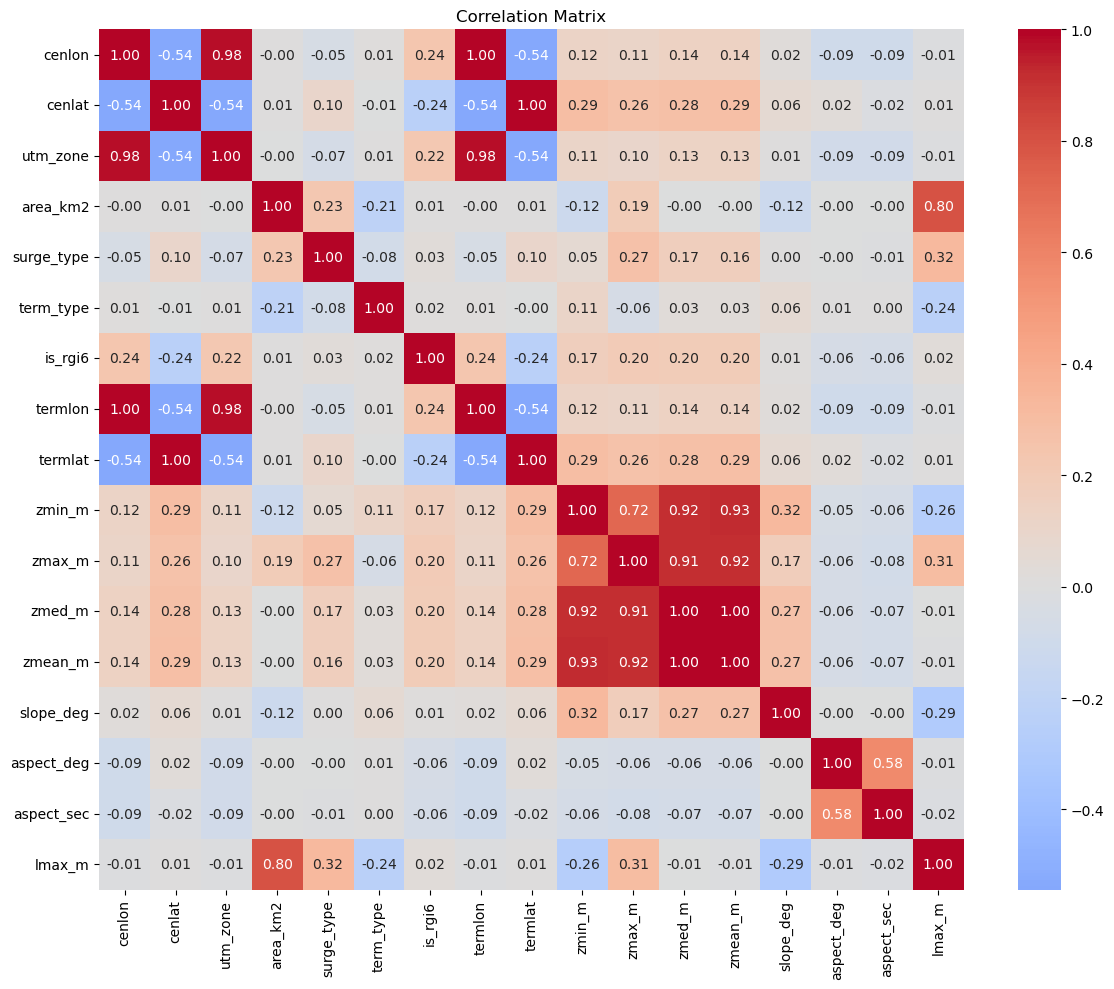

In [14]:
# make a heatmap of the correlation matrix
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

We are interested in running PCA on termlon, zmean_m, aspect_deg, area_km2, and slope_deg because these may be important for glacier boundary data, see markdown file. 

## We create a few visualizations of our selected variables

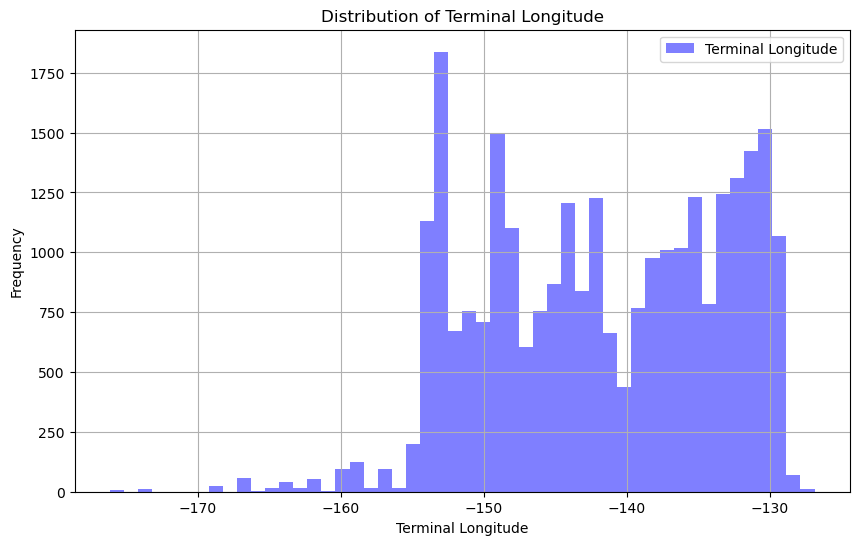

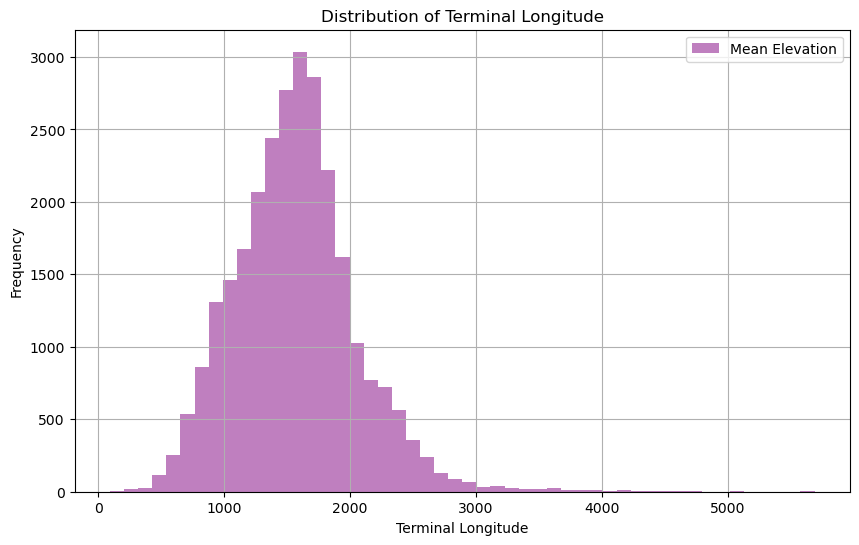

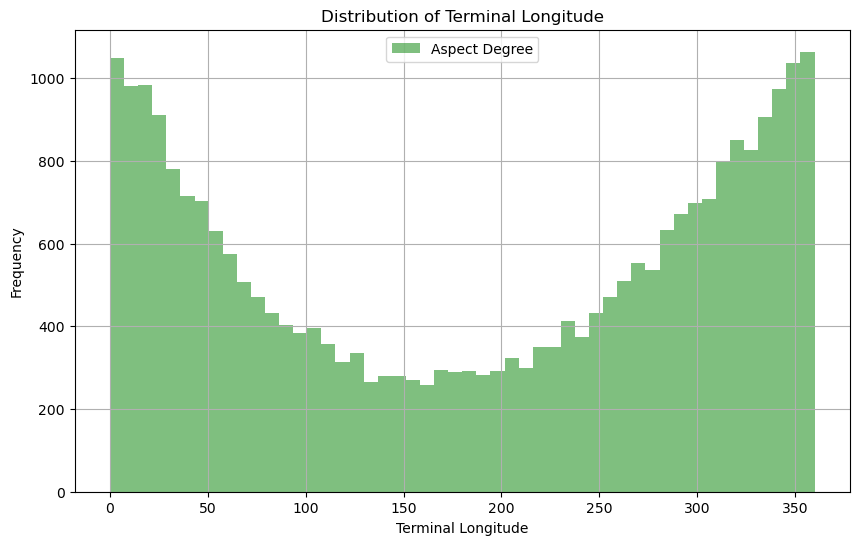

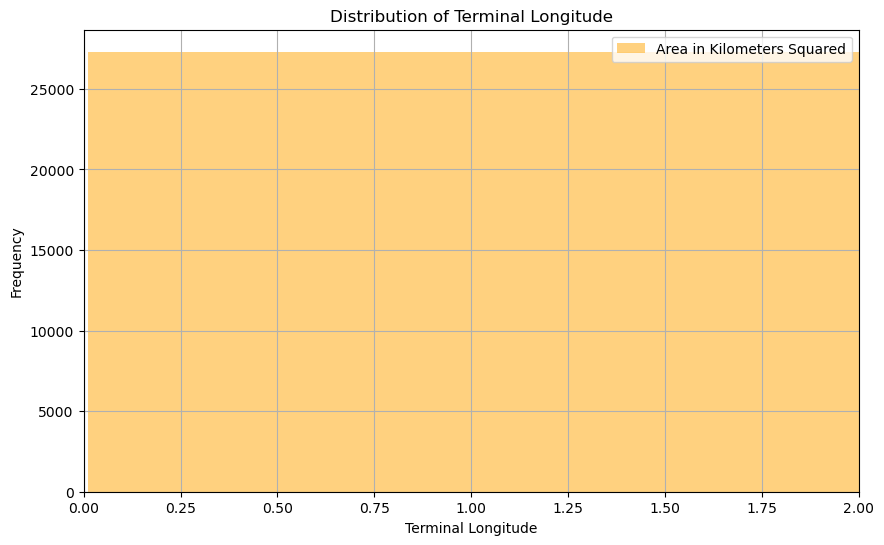

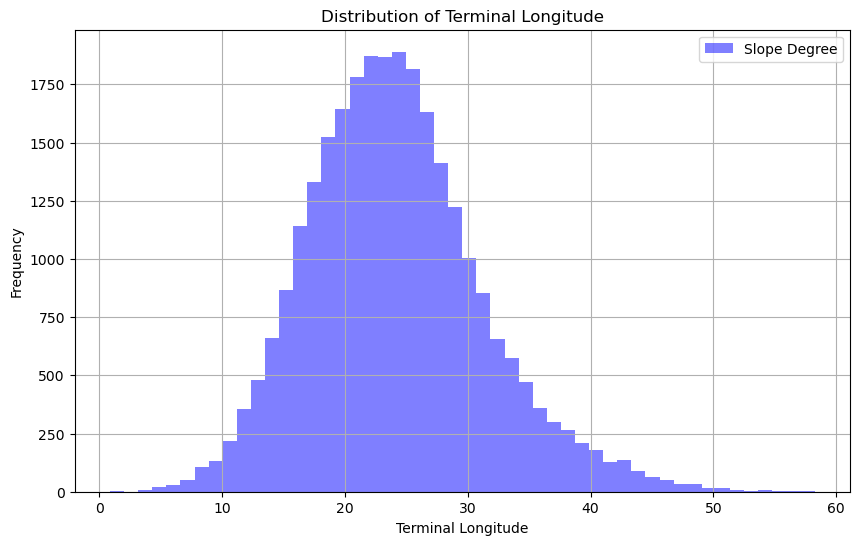

In [21]:
# Plot histograms of selected features
plt.figure(figsize=(10,6))
plt.hist(df['termlon'], bins = 50, color = 'blue', label = "Terminal Longitude", alpha = 0.5)
plt.grid()
plt.legend()
plt.title("Distribution of Terminal Longitude")
plt.xlabel("Terminal Longitude")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
plt.hist(df['zmean_m'], bins = 50, color = 'purple', label = "Mean Elevation", alpha = 0.5)
plt.grid()
plt.legend()
plt.title("Distribution of Terminal Longitude")
plt.xlabel("Terminal Longitude")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
plt.hist(df['aspect_deg'], bins = 50, color = 'green', label = "Aspect Degree", alpha = 0.5)
plt.grid()
plt.legend()
plt.title("Distribution of Terminal Longitude")
plt.xlabel("Terminal Longitude")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(10,6))
plt.hist(df['area_km2'], bins = 50, color = 'orange', label = "Area in Kilometers Squared", alpha = 0.5)
plt.grid()
plt.legend()
plt.title("Distribution of Terminal Longitude")
plt.xlim([0,2])
plt.xlabel("Terminal Longitude")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10,6))
plt.hist(df['slope_deg'], bins = 50, color = 'blue', label = "Slope Degree", alpha = 0.5)
plt.grid()
plt.legend()
plt.title("Distribution of Terminal Longitude")
plt.xlabel("Terminal Longitude")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Select only the features you want for PCA
features_for_pca = ['area_km2', 'slope_deg', 'aspect_deg', 'zmean_m',
                     'surge_type', 'term_type']
pca_data = numeric_df_clean[features_for_pca]
pca_data

,area_km2,slope_deg,aspect_deg,zmean_m,surge_type,term_type
0,0.239199,17.606613,342.330469,1553.94030,0,9
1,0.104641,19.846369,345.367012,1330.91500,0,9
2,0.216605,23.690063,13.467490,1437.23520,0,9
3,0.252649,12.782562,42.854332,1249.06620,0,9
4,0.474716,17.148510,299.058193,1273.78340,0,9
...,...,...,...,...,...,...
27504,0.190275,30.104969,24.649687,1956.88500,0,9
27505,0.230076,28.225796,85.414560,2041.02940,0,9
27506,0.187298,26.389137,348.349361,1907.25850,0,9
27507,0.152301,25.529028,70.835080,2120.08740,0,9
